In [1]:
import torch
from torch import nn

import dlc_practical_prologue as prolog

In [2]:
def nb_errors(pred, truth):
    
    pred_class = pred.argmax(1)
    return (pred_class - truth != 0).sum().item()

def nb_errors_aux(pred, truth):
    
    pred_class = pred.view(-1, 2, 10).argmax(2).argmax(1)
    return (pred_class - truth != 0).sum().item()

def train_model(model, train_input, train_target, test_input, test_target,  epochs=250, batch_size=100, lr=0.1):
    
    for i in range(0,len(model),2):
        torch.nn.init.xavier_uniform_(model[i].weight)
    
    optimizer = torch.optim.Adam(model.parameters())
    train_loss = []
    test_loss = []
    test_accuracy = []
    best_accuracy = 0
    best_epoch = 0
    
    for i in range(epochs):
        for b in range(0, train_input.size(0), batch_size):
            output = model(train_input.narrow(0, b, batch_size))
            criterion = torch.nn.CrossEntropyLoss()
            loss = criterion(output, train_target.narrow(0, b, batch_size))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        output_train = model(train_input)
        output_test = model(test_input)
        train_loss.append(criterion(output_train, train_target).item())
        test_loss.append(criterion(output_test, test_target).item())
        accuracy = 1 - nb_errors(output_test, test_target) / 1000
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = i+1
        test_accuracy.append(accuracy)
        
    return train_loss, test_loss, test_accuracy, best_accuracy

def train_model_aux(model, train_input, train_classes, test_input, test_target, test_classes,\
                epochs=250, batch_size=100, lr=0.1):
    
    for i in range(0,len(model),2):
        torch.nn.init.xavier_uniform_(model[i].weight)
        
    optimizer = torch.optim.Adam(model.parameters())
    train_loss = []
    test_loss = []
    test_accuracy = []
    best_accuracy = 0
    best_epoch = 0
    
    for i in range(epochs):
        for b in range(0, train_input.size(0), batch_size):
            output = model(train_input.narrow(0, b, batch_size))
            criterion = torch.nn.CrossEntropyLoss()
            loss = criterion(output, train_classes.narrow(0, b, batch_size))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        output_train = model(train_input)
        output_test = model(test_input)
        train_loss.append(criterion(output_train, train_classes).item())
        test_loss.append(criterion(output_test, test_classes).item())
        accuracy = 1 - nb_errors_aux(output_test, test_target) / 1000
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = i+1
        test_accuracy.append(accuracy)
       
    return train_loss, test_loss, test_accuracy, best_accuracy

### Direct Approach

In [3]:
input_dim = 2*14*14
output_dim = 2

#Number of parameters : (dim_input*hidden_dim1 + hidden_dim1*hidden_dim2 + hidden_dim2*hidden_dim3 + 
# hidden_dim3*dim_output + hidden_dim1 + hidden_dim2 + hidden_dim3 + dim_output)

model1 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, output_dim))
#50562 parameters

model2 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, output_dim))
#101112 parameters

model3 = nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(), nn.Linear(512, output_dim))
#202242 parameters

model4 = nn.Sequential(nn.Linear(input_dim, 1024), nn.ReLU(), nn.Linear(1024, output_dim))
#404482 parameters

model5 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), \
                       nn.Linear(256, output_dim))
#83842 parameters

model6 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), \
                       nn.Linear(512, output_dim))
#233218 parameters

model7 = nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), \
                       nn.Linear(1024, output_dim))
#728578 parameters

model8 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, 512),\
                       nn.ReLU(), nn.Linear(512, output_dim))
#215938 parameters

model9 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024),\
                       nn.ReLU(), nn.Linear(1024, output_dim))
#759554 parameters

model10 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, 512),\
                       nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), nn.Linear(1024, output_dim))
#742274 parameters

model11 = nn.Sequential(nn.Linear(input_dim, 64), nn.ReLU(), nn.Linear(64, 128), nn.ReLU(), nn.Linear(128, 256),\
                       nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, output_dim))
#200066 parameters

model12 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024),\
                       nn.ReLU(), nn.Linear(1024, 2048), nn.ReLU(), nn.Linear(2048, output_dim))
#2'860'802 parameters

model13 = nn.Sequential(nn.Linear(input_dim, 64), nn.ReLU(), nn.Linear(64, 128), nn.ReLU(), nn.Linear(128, 256),\
                       nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), \
                        nn.Linear(1024, output_dim))
#725442 parameters

model14 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, 512),\
                       nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), nn.Linear(1024, 2048), nn.ReLU(), \
                        nn.Linear(2048, output_dim))
#2'841'538 parameters

model15 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024),\
                       nn.ReLU(), nn.Linear(1024, 2048), nn.ReLU(), nn.Linear(2048, 4096), nn.ReLU(), \
                        nn.Linear(4096, output_dim))
#11'251'650 parameters

models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12,\
          model13, model14, model15]

In [4]:
epochs = 30
accuracies = torch.empty(15, 10, dtype=torch.float)

for i in range(10):
    train_input, train_target, train_classes, test_input, test_target, test_classes = prolog.generate_pair_sets(1000)
    train_input_direct = train_input.view(-1, input_dim)
    test_input_direct = test_input.view(-1, input_dim)
    for j in range(15):
        _, _, _, best_accuracy = train_model(models[j], train_input_direct, train_target, test_input_direct,\
                                             test_target, epochs=epochs)
        accuracies[j][i] = best_accuracy

### Auxiliary Approach

In [5]:
input_dim = 14*14
output_dim = 10

#Number of parameters : (dim_input*hidden_dim1 + hidden_dim1*hidden_dim2 + hidden_dim2*hidden_dim3 + 
# hidden_dim3*dim_output + hidden_dim1 + hidden_dim2 + hidden_dim3 + dim_output)

model1 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, output_dim))
#26'506 parameters

model2 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, output_dim))
#53'002 parameters

model3 = nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(), nn.Linear(512, output_dim))
#105'994 parameters

model4 = nn.Sequential(nn.Linear(input_dim, 1024), nn.ReLU(), nn.Linear(1024, output_dim))
#211'978 parameters

model5 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), \
                       nn.Linear(256, output_dim))
#60'810 parameters

model6 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), \
                       nn.Linear(512, output_dim))
#187'146 parameters

model7 = nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), \
                       nn.Linear(1024, output_dim))
#636'426 parameters

model8 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, 512),\
                       nn.ReLU(), nn.Linear(512, output_dim))
#194'954 parameters

model9 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024),\
                       nn.ReLU(), nn.Linear(1024, output_dim))
#717'578 parameters

model10 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, 512),\
                       nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), nn.Linear(1024, output_dim))
#724'362 parameters

model11 = nn.Sequential(nn.Linear(input_dim, 64), nn.ReLU(), nn.Linear(64, 128), nn.ReLU(), nn.Linear(128, 256),\
                       nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, output_dim))
#190'666 parameters

model12 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024),\
                       nn.ReLU(), nn.Linear(1024, 2048), nn.ReLU(), nn.Linear(2048, output_dim))
#2'827'018 parameters

model13 = nn.Sequential(nn.Linear(input_dim, 64), nn.ReLU(), nn.Linear(64, 128), nn.ReLU(), nn.Linear(128, 256),\
                       nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), \
                        nn.Linear(1024, output_dim))
#721'098 parameters

model14 = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, 512),\
                       nn.ReLU(), nn.Linear(512, 1024), nn.ReLU(), nn.Linear(1024, 2048), nn.ReLU(), \
                        nn.Linear(2048, output_dim))
#2'834'826 parameters

model15 = nn.Sequential(nn.Linear(input_dim, 256), nn.ReLU(), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1024),\
                       nn.ReLU(), nn.Linear(1024, 2048), nn.ReLU(), nn.Linear(2048, 4096), nn.ReLU(), \
                        nn.Linear(4096, output_dim))
#11'240'202 parameters

models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12,\
          model13, model14, model15]

In [6]:
epochs = 100
accuracies_aux = torch.empty(15, 10, dtype=torch.float)

for i in range(10):
    train_input, train_target, train_classes, test_input, test_target, test_classes = prolog.generate_pair_sets(1000)
    train_input_aux = train_input.view(-1, input_dim)
    test_input_aux = test_input.view(-1, input_dim)
    train_classes_aux = train_classes.view(2000)
    test_classes_aux = test_classes.view(2000)
    for j in range(15):
        _, _, _, best_accuracy = train_model_aux(models[j], train_input_aux, train_classes_aux, \
                                                       test_input_aux, test_target, test_classes_aux, \
                                                       epochs=epochs)
        accuracies_aux[j][i] = best_accuracy

In [8]:
accuracies.mean(1)

tensor([0.7628, 0.7782, 0.8028, 0.8031, 0.7536, 0.7677, 0.7823, 0.7497, 0.7651,
        0.7453, 0.7149, 0.7713, 0.7168, 0.7519, 0.7849])

In [9]:
accuracies.std(1)

tensor([0.0142, 0.0198, 0.0119, 0.0211, 0.0152, 0.0150, 0.0120, 0.0187, 0.0136,
        0.0135, 0.0169, 0.0156, 0.0216, 0.0167, 0.0079])

In [12]:
accuracies.median(1)

torch.return_types.median(
values=tensor([0.7580, 0.7800, 0.8030, 0.8090, 0.7570, 0.7720, 0.7790, 0.7500, 0.7600,
        0.7420, 0.7170, 0.7710, 0.7230, 0.7550, 0.7850]),
indices=tensor([9, 1, 6, 5, 4, 7, 9, 3, 1, 1, 6, 2, 2, 8, 3]))

In [13]:
accuracies.max(1)

torch.return_types.max(
values=tensor([0.7880, 0.8070, 0.8180, 0.8240, 0.7810, 0.7880, 0.8120, 0.7840, 0.7870,
        0.7660, 0.7400, 0.7940, 0.7340, 0.7680, 0.7990]),
indices=tensor([2, 6, 9, 6, 6, 3, 6, 2, 6, 5, 0, 6, 3, 7, 1]))

In [14]:
accuracies.min(1)

torch.return_types.min(
values=tensor([0.7410, 0.7460, 0.7820, 0.7520, 0.7240, 0.7360, 0.7670, 0.7130, 0.7450,
        0.7220, 0.6880, 0.7410, 0.6650, 0.7090, 0.7730]),
indices=tensor([8, 8, 1, 8, 9, 4, 8, 4, 0, 3, 3, 8, 9, 9, 8]))

Model 3 and 4 seem to be the best

In [15]:
accuracies_aux.mean(1)

tensor([0.9176, 0.9294, 0.9485, 0.9563, 0.9238, 0.9427, 0.9497, 0.9308, 0.9447,
        0.9334, 0.9152, 0.9468, 0.9153, 0.9351, 0.9543])

In [16]:
accuracies_aux.std(1)

tensor([0.0086, 0.0073, 0.0073, 0.0046, 0.0084, 0.0043, 0.0089, 0.0082, 0.0034,
        0.0093, 0.0105, 0.0071, 0.0061, 0.0079, 0.0059])

In [17]:
accuracies_aux.median(1)

torch.return_types.median(
values=tensor([0.9160, 0.9290, 0.9490, 0.9570, 0.9220, 0.9430, 0.9530, 0.9320, 0.9430,
        0.9310, 0.9130, 0.9460, 0.9150, 0.9350, 0.9530]),
indices=tensor([9, 4, 5, 5, 3, 6, 4, 3, 3, 7, 9, 0, 7, 5, 7]))

In [18]:
accuracies_aux.max(1)

torch.return_types.max(
values=tensor([0.9320, 0.9420, 0.9600, 0.9640, 0.9410, 0.9500, 0.9600, 0.9450, 0.9500,
        0.9460, 0.9280, 0.9620, 0.9260, 0.9450, 0.9640]),
indices=tensor([8, 0, 9, 8, 8, 8, 9, 8, 1, 8, 6, 8, 6, 0, 8]))

In [19]:
accuracies_aux.min(1)

torch.return_types.min(
values=tensor([0.9060, 0.9200, 0.9350, 0.9480, 0.9130, 0.9350, 0.9330, 0.9160, 0.9410,
        0.9140, 0.8940, 0.9380, 0.9080, 0.9220, 0.9460]),
indices=tensor([7, 3, 4, 7, 2, 1, 2, 1, 2, 1, 8, 4, 3, 2, 4]))

Model 4 seems to be the best

The best models have 200'000-400'000 parameters, we try to create other models with this number of parameters but different architectures

### Direct Approach Again

In [3]:
input_dim = 2*14*14
output_dim = 2

model16 = nn.Sequential(nn.Linear(input_dim, 200), nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, 200),\
                       nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), \
                        nn.Linear(200, output_dim))
#239'802 parameters

model17 = nn.Sequential(nn.Linear(input_dim, 200), nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, 200),\
                       nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, output_dim))
#199'602 parameters

model18 = nn.Sequential(nn.Linear(input_dim, 300), nn.ReLU(), nn.Linear(300, 300), nn.ReLU(), nn.Linear(300, 300),\
                       nn.ReLU(), nn.Linear(300, 300), nn.ReLU(), nn.Linear(300, output_dim))
#389'402 parameters

model19 = nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(), nn.Linear(512, 256), nn.ReLU(), nn.Linear(256, 128),\
                       nn.ReLU(), nn.Linear(128, output_dim))
#266'378 parameters

model20 = nn.Sequential(nn.Linear(input_dim, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100),\
                       nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100),\
                        nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100),\
                        nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, output_dim))
#201'102 parameters

models = [model16, model17, model18, model19, model20]

In [4]:
epochs = 50
accuracies = torch.empty(5, 10, dtype=torch.float)

for i in range(10):
    train_input, train_target, train_classes, test_input, test_target, test_classes = prolog.generate_pair_sets(1000)
    train_input_direct = train_input.view(-1, input_dim)
    test_input_direct = test_input.view(-1, input_dim)
    for j in range(5):
        _, _, _, best_accuracy = train_model(models[j], train_input_direct, train_target, test_input_direct,\
                                             test_target, epochs=epochs)
        accuracies[j][i] = best_accuracy

In [5]:
accuracies.mean(1)

tensor([0.7582, 0.7434, 0.7684, 0.7816, 0.7928])

In [6]:
accuracies.std(1)

tensor([0.0129, 0.0172, 0.0160, 0.0139, 0.0154])

In [7]:
accuracies.median(1)

torch.return_types.median(
values=tensor([0.7580, 0.7410, 0.7660, 0.7750, 0.7900]),
indices=tensor([9, 3, 8, 2, 0]))

In [8]:
accuracies.max(1)

torch.return_types.max(
values=tensor([0.7830, 0.7680, 0.7940, 0.8040, 0.8280]),
indices=tensor([3, 5, 5, 5, 5]))

In [9]:
accuracies.min(1)

torch.return_types.min(
values=tensor([0.7390, 0.7210, 0.7410, 0.7600, 0.7680]),
indices=tensor([8, 8, 1, 3, 8]))

### Auxiliary Approach Again

In [10]:
input_dim = 14*14
output_dim = 10

model16 = nn.Sequential(nn.Linear(input_dim, 200), nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, 200),\
                       nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), \
                        nn.Linear(200, output_dim))
#202'210 parameters

model17 = nn.Sequential(nn.Linear(input_dim, 200), nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, 200),\
                       nn.ReLU(), nn.Linear(200, 200), nn.ReLU(), nn.Linear(200, output_dim))
#162'010 parameters

model18 = nn.Sequential(nn.Linear(input_dim, 300), nn.ReLU(), nn.Linear(300, 300), nn.ReLU(), nn.Linear(300, 300),\
                       nn.ReLU(), nn.Linear(300, 300), nn.ReLU(), nn.Linear(300, output_dim))
#333'010 parameters

model19 = nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(), nn.Linear(512, 256), nn.ReLU(), nn.Linear(256, 128),\
                        nn.ReLU(), nn.Linear(128, output_dim))
#365'698 parameters

model20 = nn.Sequential(nn.Linear(input_dim, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100),\
                       nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100),\
                        nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100),\
                        nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),\
                        nn.Linear(100, output_dim))
#231'610 parameters

models = [model16, model17, model18, model19, model20]

In [11]:
epochs = 100
accuracies_aux = torch.empty(5, 10, dtype=torch.float)

for i in range(10):
    train_input, train_target, train_classes, test_input, test_target, test_classes = prolog.generate_pair_sets(1000)
    train_input_aux = train_input.view(-1, input_dim)
    test_input_aux = test_input.view(-1, input_dim)
    train_classes_aux = train_classes.view(2000)
    test_classes_aux = test_classes.view(2000)
    for j in range(5):
        _, _, _, best_accuracy = train_model_aux(models[j], train_input_aux, train_classes_aux, \
                                                       test_input_aux, test_target, test_classes_aux, \
                                                       epochs=epochs)
        accuracies_aux[j][i] = best_accuracy

In [12]:
accuracies_aux.mean(1)

tensor([0.9340, 0.9228, 0.9415, 0.9430, 0.9499])

In [13]:
accuracies_aux.std(1)

tensor([0.0091, 0.0080, 0.0062, 0.0080, 0.0073])

In [14]:
accuracies_aux.median(1)

torch.return_types.median(
values=tensor([0.9360, 0.9220, 0.9400, 0.9420, 0.9490]),
indices=tensor([2, 0, 9, 8, 6]))

In [15]:
accuracies_aux.max(1)

torch.return_types.max(
values=tensor([0.9510, 0.9320, 0.9540, 0.9530, 0.9600]),
indices=tensor([7, 7, 7, 6, 7]))

In [16]:
accuracies_aux.min(1)

torch.return_types.min(
values=tensor([0.9210, 0.9060, 0.9300, 0.9290, 0.9350]),
indices=tensor([4, 4, 4, 4, 0]))

### Confusion Matrix

In [66]:
def confusion_matrix(pred, y, n_classes):
    
    conf = torch.zeros(n_classes, n_classes)
    for i in range(len(pred)):
        conf[y[i].max()][pred[i].argmax()] += 1
        
    return conf

def train_model_aux_conf(model, train_input, train_classes, test_input, test_target, test_classes,\
                epochs=250, batch_size=100, lr=0.1):
    
    for i in range(0,len(model),2):
        torch.nn.init.xavier_uniform_(model[i].weight)
        
    optimizer = torch.optim.Adam(model.parameters())
    train_loss = []
    test_loss = []
    test_accuracy = []
    best_accuracy = 0
    best_epoch = 0
    conf = torch.zeros(10, 10)
    
    for i in range(epochs):
        for b in range(0, train_input.size(0), batch_size):
            output = model(train_input.narrow(0, b, batch_size))
            criterion = torch.nn.CrossEntropyLoss()
            loss = criterion(output, train_classes.narrow(0, b, batch_size))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        output_train = model(train_input)
        output_test = model(test_input)
        train_loss.append(criterion(output_train, train_classes).item())
        test_loss.append(criterion(output_test, test_classes).item())
        accuracy = 1 - nb_errors_aux(output_test, test_target) / 1000
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = i+1
            conf = confusion_matrix(output_test, test_classes, 10)
        test_accuracy.append(accuracy)
       
    return train_loss, test_loss, test_accuracy, best_accuracy, conf

In [83]:
input_dim = 14*14
output_dim = 10

model = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), \
                       nn.Linear(256, output_dim))

In [84]:
epochs = 100
conf = torch.zeros(10, 10)

for i in range(10):
    train_input, train_target, train_classes, test_input, test_target, test_classes = prolog.generate_pair_sets(1000)
    train_input_aux = train_input.view(-1, input_dim)
    test_input_aux = test_input.view(-1, input_dim)
    train_classes_aux = train_classes.view(2000)
    test_classes_aux = test_classes.view(2000)
    _, _, _, _, temp_conf = train_model_aux_conf(model, train_input_aux, train_classes_aux, test_input_aux,\
                                                 test_target, test_classes_aux, epochs=epochs)
    conf += temp_conf

In [95]:
for i in range(10):
    conf[i] = conf[i] / conf[i].sum()

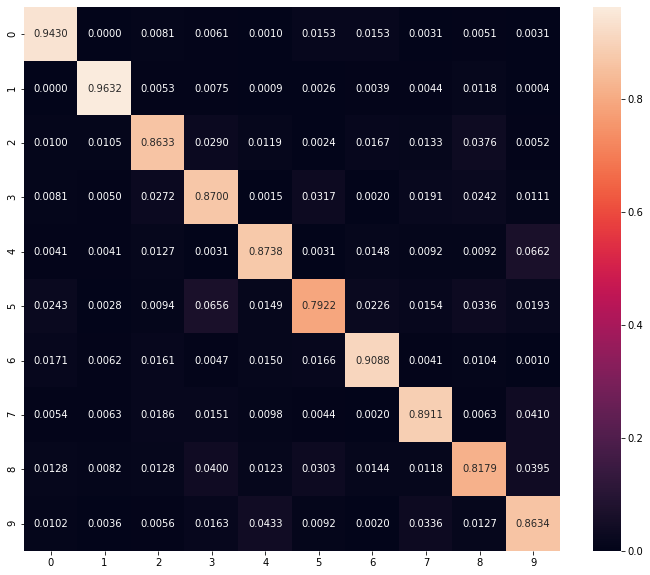

In [108]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf.detach().numpy(), index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (12,10))
sn.heatmap(df_cm, annot=True, fmt='.4f');